# Accumulated Local Effects (ALE)

Let's calculate ALE plots for the most important predictors using a gradient boosting model on diabetes data.

The error bars represent estimated standard errors.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from ale import accumulated_local_effects
from sklearn.datasets import load_diabetes
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance


In [26]:
# Load data and fit model
X, y = load_diabetes(return_X_y=True, as_frame=True)

est = HistGradientBoostingRegressor(max_iter=50, max_depth=4).fit(X, y)

# Get the top 4 most important features
m = 4
imp = permutation_importance(est, X, y, random_state=0)
top_m = X.columns[np.argsort(imp.importances_mean)[-m:]]

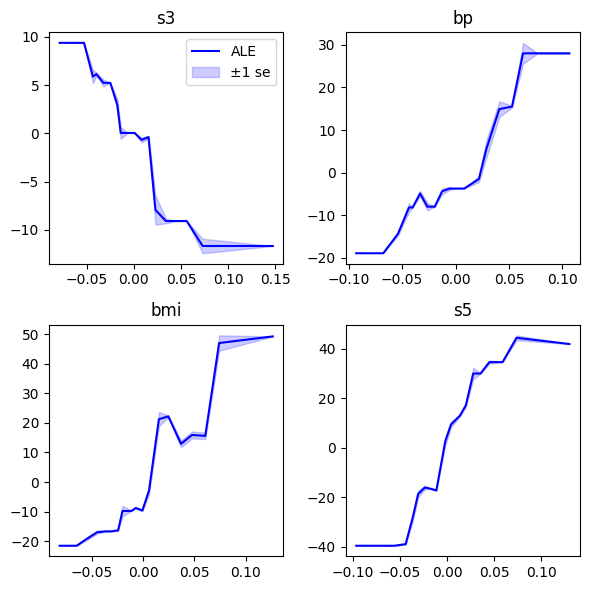

In [ ]:
# Plot results for top 4 predictors
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for feature, ax in zip(top_m, axes.flatten()):
    ale = accumulated_local_effects(X, est.predict, feature=feature)

    # Plot the main ALE line
    ax.plot(ale["breaks"], ale["ale"], "b-", label="ALE")

    # Calculate confidence intervals (e.g., using 1 standard deviation)
    standard_errors = ale["standard_deviations"] / np.sqrt(ale["bin_sizes"])
    upper, lower = (ale["ale"] + ind * standard_errors for ind in (1, -1))

    # Add shaded area for error bounds
    ax.fill_between(ale["breaks"], lower, upper, alpha=0.2, color="blue", label="±1 se")
    ax.set_title(f"{feature}")

    if feature == top_m[0]:
        ax.legend()

plt.tight_layout()
plt.show()
